In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd  drive/My\ Drive/keras_data/dogs-vs-cats

/content/drive/My Drive/keras_data/dogs-vs-cats


In [3]:
# 将猫狗分类的小型卷积神经网络实例化
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [4]:
# 配置模型
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
# 使用ImageDataGenerator从目录中读取图像
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                  'train',
                  target_size=(150,150),
                  batch_size=20,
                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                  'validation',
                  target_size=(150,150),
                  batch_size=20,
                  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# 利用批量生成器拟合模型
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)




Epoch 1/30





100/100 [==============================] - 562s 6s/step - loss: 0.6912 - acc: 0.5380 - val_loss: 0.6766 - val_acc: 0.6120
Epoch 2/30
100/100 [==============================] - 11s 105ms/step - loss: 0.6584 - acc: 0.6085 - val_loss: 0.6506 - val_acc: 0.6080
Epoch 3/30
100/100 [==============================] - 10s 101ms/step - loss: 0.6117 - acc: 0.6655 - val_loss: 0.6179 - val_acc: 0.6610
Epoch 4/30
100/100 [==============================] - 10s 101ms/step - loss: 0.5672 - acc: 0.7030 - val_loss: 0.5831 - val_acc: 0.6820
Epoch 5/30
100/100 [==============================] - 10s 103ms/step - loss: 0.5320 - acc: 0.7310 - val_loss: 0.5929 - val_acc: 0.6790
Epoch 6/30
100/100 [==============================] - 10s 100ms/step - loss: 0.5077 - acc: 0.7480 - val_loss: 0.5661 - val_acc: 0.7050
Epoch 7/30
100/100 [==============================] - 10s 101ms/step - loss: 0.4746 - acc: 0.7705 - val_loss: 0.6176 - val_acc: 0.6740
Epoch 8/30
100/100 [=============================

In [0]:
# 保存模型
model.save('cats_and_dogs_small_1.h5')

In [0]:
# ImageDataGenerator设置数据增强
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

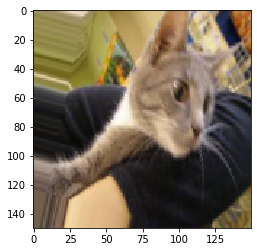

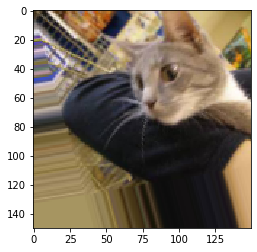

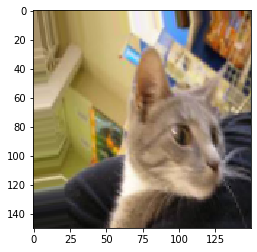

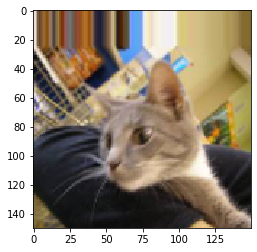

In [14]:
# 显示几个随即增强后的图像
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image

fnames = [os.path.join('train/cats', fname) for fname in os.listdir('train/cats')]
img_path = fnames[5]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [15]:
# 定一个包含dropout的新卷积神经网络
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
# 利用数据增强生成器训练卷积神经网络
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                  'train',
                  target_size=(150,150),
                  batch_size=32,
                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                  'validation',
                  target_size=(150,150),
                  batch_size=32,
                  class_mode='binary')
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 32s 317ms/step - loss: 0.6907 - acc: 0.5234 - val_loss: 0.6770 - val_acc: 0.5723
Epoch 2/100
100/100 [==============================] - 28s 284ms/step - loss: 0.6794 - acc: 0.5653 - val_loss: 0.6730 - val_acc: 0.5599
Epoch 3/100
100/100 [==============================] - 29s 285ms/step - loss: 0.6669 - acc: 0.5884 - val_loss: 0.6875 - val_acc: 0.5584
Epoch 4/100
100/100 [==============================] - 28s 285ms/step - loss: 0.6503 - acc: 0.6184 - val_loss: 0.6436 - val_acc: 0.5966
Epoch 5/100
100/100 [==============================] - 28s 276ms/step - loss: 0.6382 - acc: 0.6247 - val_loss: 0.6034 - val_acc: 0.6707
Epoch 6/100
100/100 [==============================] - 31s 310ms/step - loss: 0.6287 - acc: 0.6553 - val_loss: 0.6055 - val_acc: 0.6598
Epoch 7/100
100/100 [==============================] - 28s 283ms/step - loss: 0.5953 - acc: 0.6784 -

In [0]:
model.save('cats_and_dogs_small_2.h5')